In [1]:
from jax import config
config.update('jax_enable_x64', True)
from pathlib import Path

import jax
import gpjax as gpx
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt

from uncprop.utils.experiment import Experiment
from uncprop.models.vsem.experiment import VSEMReplicate
from uncprop.utils.plot import set_plot_theme
from uncprop.utils.grid import Grid, DensityComparisonGrid

colors = set_plot_theme()
base_dir = Path('/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper')

/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
key = jr.key(2364253)
setup_kwargs = {'n_grid': 50, 'n_design': 8, 'noise_sd': 1.0}
num_reps = 3
experiment_name = 'vsem'
out_dir = base_dir / 'out' / experiment_name

# 3 cases: n = 4, 8, and one other (maybe 16)

def _make_subdir_name(setup_kwargs, run_kwargs):
    return f'{run_kwargs['surrogate_tag']}_N{setup_kwargs['n_design']}'

experiment = Experiment(name=experiment_name,
                        num_reps=num_reps,
                        base_out_dir=out_dir,
                        base_key=key,
                        Replicate=VSEMReplicate,
                        subdir_name_fn=_make_subdir_name)

results_gp, failed_iters_gp = experiment(run_kwargs={'surrogate_tag': 'gp'}, 
                                         setup_kwargs=setup_kwargs)

results_clip_gp, failed_iters_clip_gp = experiment(run_kwargs={'surrogate_tag': 'clip_gp'}, 
                                                   setup_kwargs=setup_kwargs)

Creating new output directory: /Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/out/vsem
Creating experiment sub-directory: /Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/out/vsem/gp_8
Running replicate 0
Initial loss 47.9561145140677
Final loss 43.21383076442526
gp scale: 147.39240422343968
gp lengthscales: [0.45445629 4.07657591]
gp noise std dev: 1.0000176051353764e-06
Running replicate 1
Initial loss 41.80294678950841
Final loss 38.1993716794236
gp scale: 76.48959539981321
gp lengthscales: [0.48737381 4.54060268]
gp noise std dev: 0.012545748250994939
Running replicate 2
Initial loss 49.92484172564476
Final loss 44.60062321433654
gp scale: 89.26680921686733
gp lengthscales: [0.53541564 1.69863256]
gp noise std dev: 0.0006343870425884721
Creating experiment sub-directory: /Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/out/vsem/clip_gp_8
Running replicate 0
Initial loss 47.9561145140677
Final loss 43.21383076442526
gp scale: 147.39240422343968
gp 

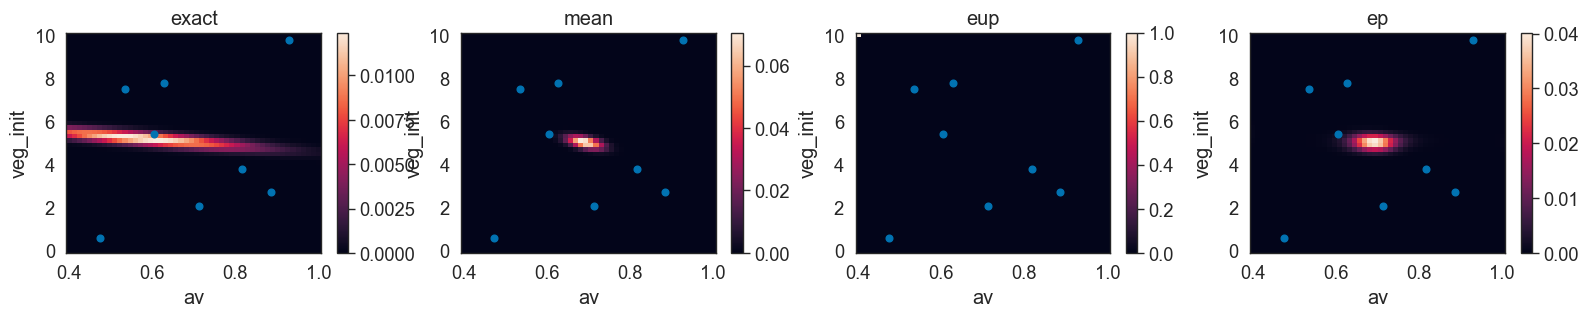

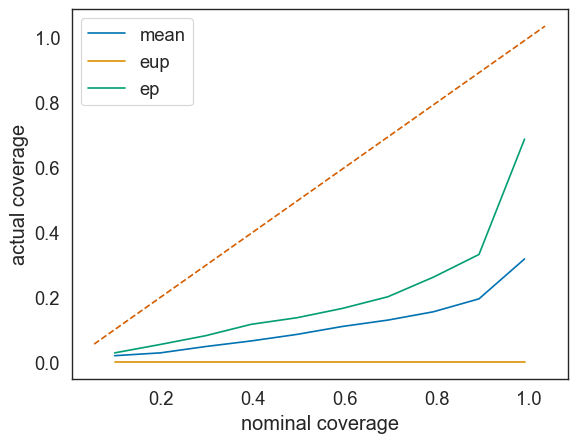

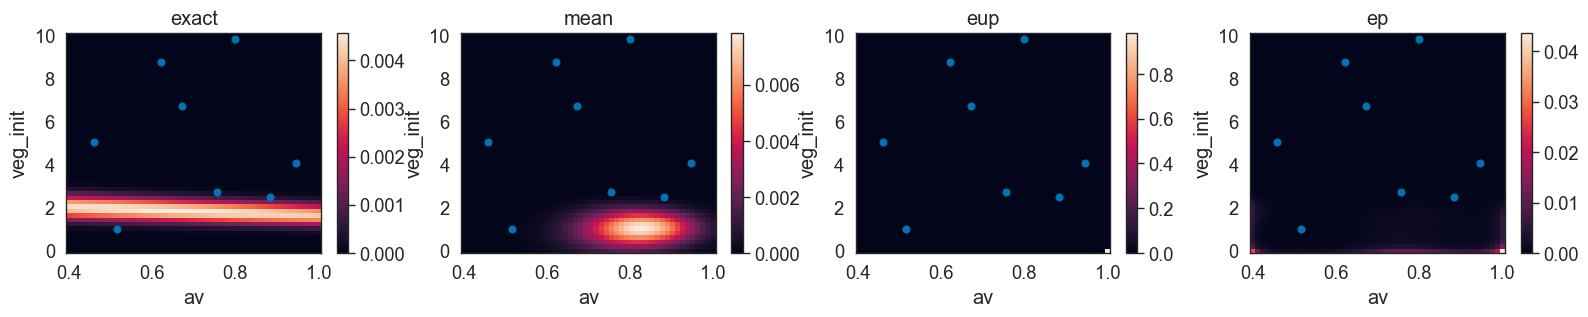

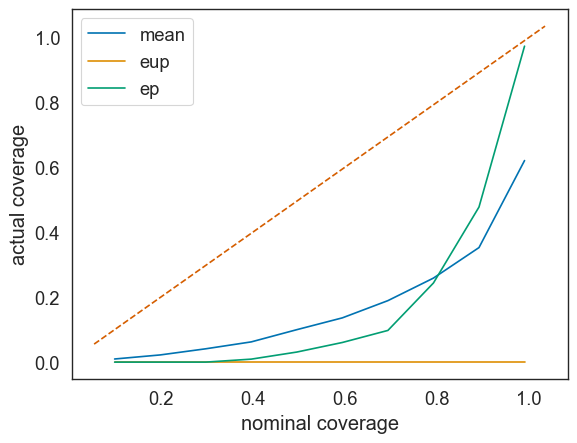

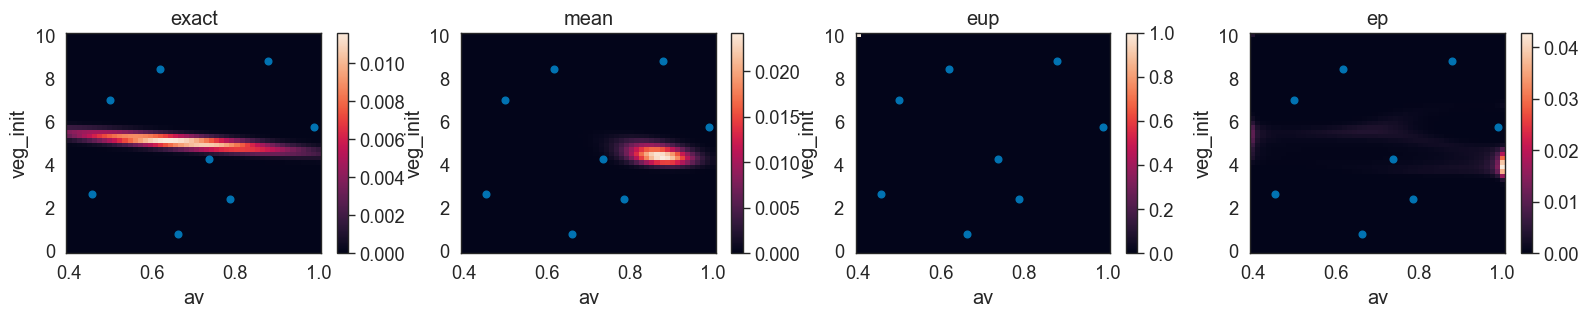

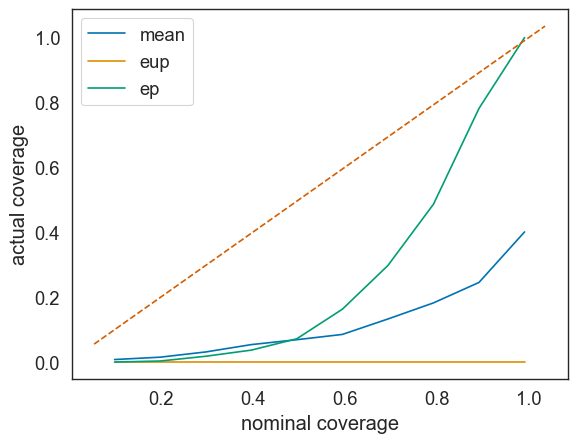

In [3]:
for rep in results_gp:
    rep.density_comparison.plot(normalized=True, log_scale=False,
                                max_cols=4, points=rep.surrogate_posterior_gp.surrogate.design.X)
    rep.density_comparison.plot_coverage(baseline='exact')

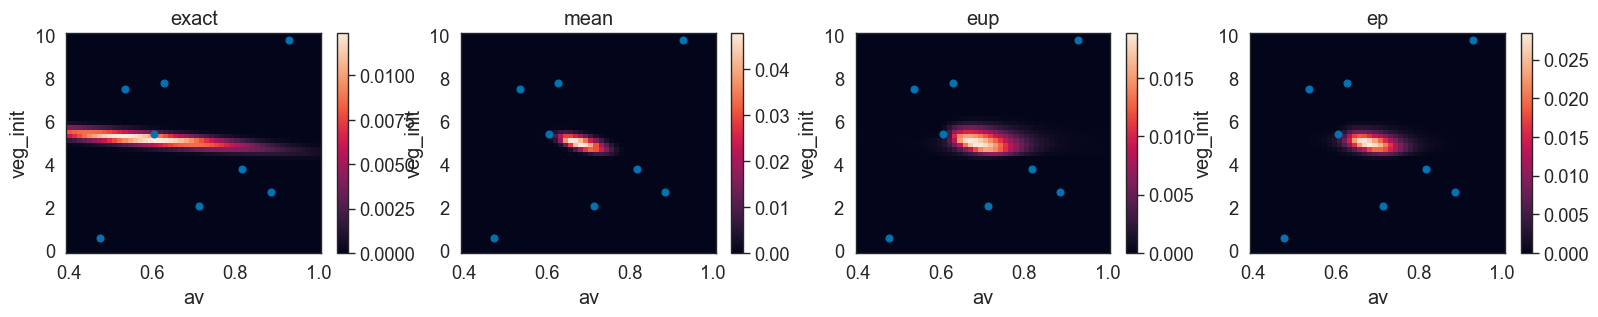

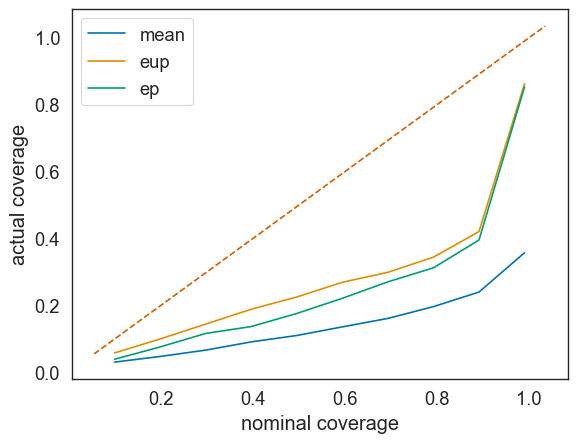

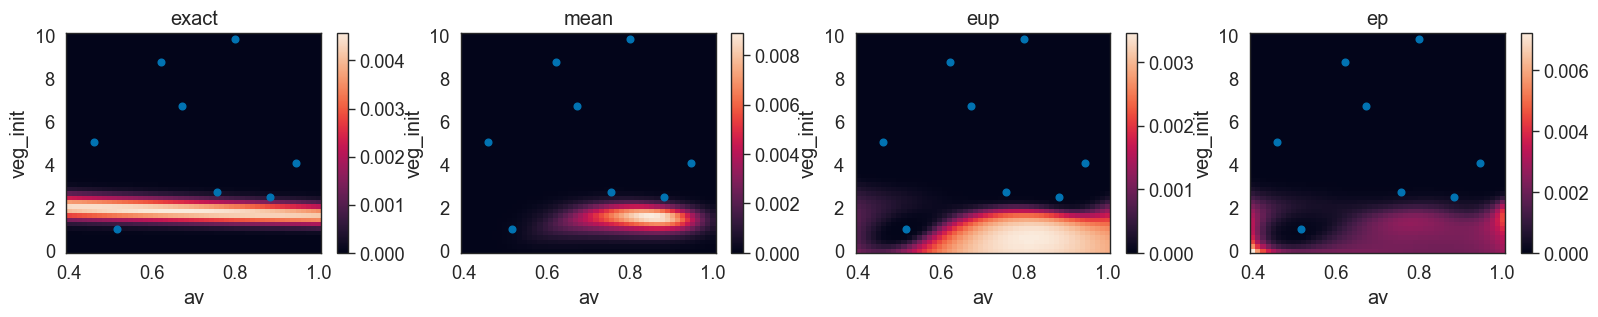

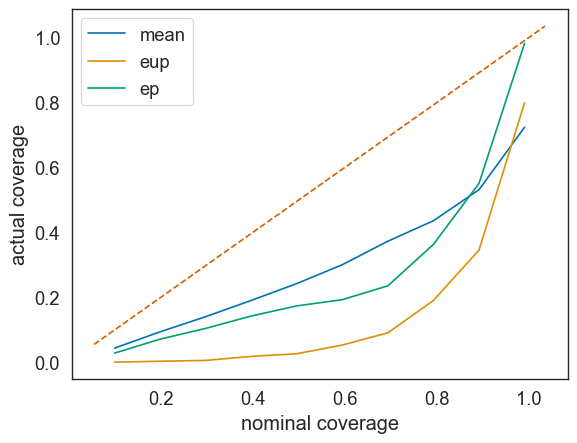

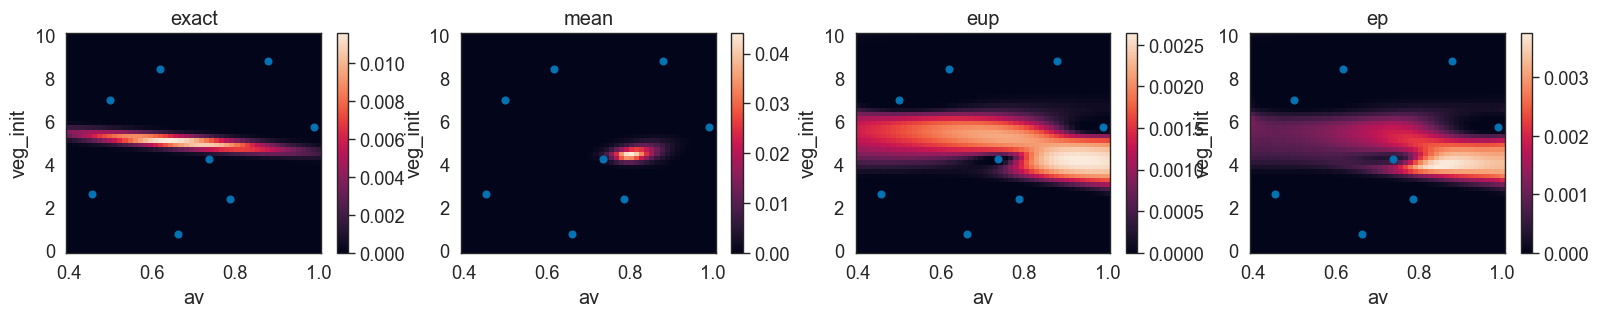

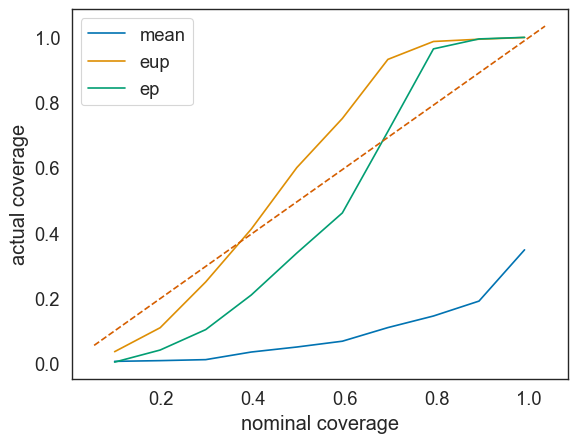

In [4]:
for rep in results_clip_gp:
    rep.density_comparison.plot(normalized=True, log_scale=False,
                                max_cols=4, points=rep.surrogate_posterior_clip_gp.surrogate.design.X)
    rep.density_comparison.plot_coverage(baseline='exact')

In [ ]:
from uncprop.utils.grid import plot_coverage_curve_reps

log_coverage_reps = jnp.stack(
    [rep.density_comparison.calc_coverage(baseline='exact')[0] for rep in results_clip_gp],
    axis=0
)

probs = results_clip_gp[0].density_comparison.calc_coverage(baseline='exact')[1]

fig, ax = plot_coverage_curve_reps(log_coverage_reps, probs=probs, names=['mean', 'eup', 'ep'])

In [ ]:
# summarize surrogate mean and sd
pred = surrogate_posterior.surrogate(grid.flat_grid)

grid.plot(z=pred.mean, title='surrogate mean', points=design.X)
grid.plot(z=jnp.sqrt(pred.variance), title='surrogate sd', points=design.X)

In [ ]:
# sampling posterior
key, key_mcmc = jr.split(key, 2)

samp = posterior.sample(key, n=3000, num_warmup_steps=500) # returns HMCState with samp.position (n, 1, 2)

plt.hist(samples[:,0])
plt.show()

In [ ]:
density_comparison.plot(['exact', 'mean', 'eup', 'ep'],
                         normalized=True, log_scale=False,
                         max_cols=4, points=design.X)

In [ ]:
from uncprop.utils.grid import get_grid_coverage_mask, plot_2d_mask

mask = get_grid_coverage_mask(log_prob=density_comparison.log_dens_norm_grid['ep'],
                              probs=jnp.linspace(0.1, 0.9, 30))

fig, ax = plot_2d_mask(mask, grid.shape, prob_idx=[0, 15, 20])

# TEMP

In [ ]:
import blackjax

In [ ]:
mwg_init_x = blackjax.rmh.init